In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/res/')
from BySanti import filter

In [3]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_sets/Entrenamieto_ECI_2020.csv')
filter.full_correction(train)

In [24]:
train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Total_Power,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,4,2015-06-16,NaN,Netherlands,619,12598,0,NaN,51,18,2.0,1,Non Binding,Delivery_Terms_2,2015-12-07,NaN,NaN,None,None,NaN,None,2016-01-30,2016-06-13,18,77,99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,"(5, 2016)",Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,4,2015-06-16,NaN,Netherlands,619,12600,1,39.0,51,20,2.0,1,Non Binding,Delivery_Terms_2,2015-12-07,NaN,NaN,None,None,NaN,None,2016-01-20,2016-01-15,20,77,100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,"(1, 2016)",Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,4,2015-04-21,7.0,United States,1794,469,2,760.0,64,8,5.0,1,Non Binding,Delivery_Terms_4,2015-12-08,NaN,NaN,None,None,NaN,None,2016-09-30,2016-09-29,8,81,91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,"(1, 2016)",Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,5,2013-07-27,11.0,United States,1201,415,3,NaN,8,8,5.0,19,Non Binding,Delivery_Terms_1,2015-12-08,NaN,0.0,Size_4,Product_Category_B_16,0.42,USD,NaT,2018-03-27,8,209,432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,"(2, 2018)",Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,5,2013-07-27,11.0,United States,1201,851,4,NaN,8,8,5.0,19,Non Binding,Delivery_Terms_1,2015-12-08,NaN,0.0,Size_4,Product_Category_B_16,0.42,USD,2017-06-02,2018-03-27,8,209,432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,"(2, 2018)",Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,4,2016-01-15,7.0,Austria,726,9245,12801,44.0,13,13,5.0,1,Non Binding,Delivery_Terms_2,2015-12-04,NaN,NaN,None,None,NaN,None,NaT,2016-01-19,13,85,111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,"(3, 2016)",Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,4,2016-01-15,7.0,Austria,726,9245,12801,44.0,13,13,5.0,1,Non Binding,Delivery_Terms_2,2015-12-04,NaN,NaN,None,None,NaN,None,NaT,2016-01-19,13,85,111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,"(4, 2016)",Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,4,2016-01-15,7.0,Austria,726,9245,12801,44.0,13,13,5.0,1,Non Binding,Delivery_Terms_2,2015-12-04,NaN,NaN,None,None,NaN,None,NaT,2016-01-19,13,85,111,EUR,0.5200,USD,0.58817,2016-03-28,2016-03-31,"(3, 2016)",Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,4,2015-10-20,NaN,United States,944,5843,12802,NaN,3,3,5.0,1,Non Binding,Delivery_Terms_4,2015-12-05,NaN,NaN,None,None,NaN,None,2016-02-29,2016-01-22,3,158,287,USD,0.6375,USD,0.63750,2016-04-25,2016-04-29,"(4, 2016)",Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [39]:
strain = train[["Region", "Bureaucratic_Code", "Opportunity_ID", "Stage"]]


,Region,Bureaucratic_Code,Opportunity_ID,Stage
0,EMEA,4,0,Closed Lost
1,EMEA,4,1,Closed Won
2,Americas,4,2,Closed Won
3,Americas,5,3,Closed Lost
4,Americas,5,4,Closed Lost
...,...,...,...,...
16942,EMEA,4,12801,Closed Won
16943,EMEA,4,12801,Closed Won
16944,EMEA,4,12801,Closed Won
16945,Americas,4,12802,Closed Lost


In [107]:
sstrain = strain.groupby(["Region", "Bureaucratic_Code", "Opportunity_ID", "Stage"])["Stage"].count().to_frame('stage_count').reset_index()
#print(sstrain)

s2strain  = strain.groupby(["Region", "Stage", "Bureaucratic_Code", ])["Stage"].count().to_frame('stage_count').reset_index()

s3strain =  s2strain.groupby(["Region", "Stage"])["stage_count"].sum().to_frame('stage_sum').reset_index()
#s3strain

merge_df = s2strain.merge(s3strain)

merge_df["ratio"] = merge_df.apply (lambda row: round(row["stage_count"] / row["stage_sum"] * 100, 2), axis=1)
merge_df

#sstrain.groupby(["Region", "Bureaucratic_Code", "Opportunity_ID", "Stage"])["Stage"].count().to_frame('vvv').reset_index()

,Region,Stage,Bureaucratic_Code,stage_count,stage_sum,ratio
0,APAC,Closed Lost,1,55,1355,4.06
1,APAC,Closed Lost,2,52,1355,3.84
2,APAC,Closed Lost,3,1,1355,0.07
3,APAC,Closed Lost,4,839,1355,61.92
4,APAC,Closed Lost,5,408,1355,30.11
5,APAC,Closed Won,0,2,1896,0.11
6,APAC,Closed Won,1,47,1896,2.48
7,APAC,Closed Won,2,4,1896,0.21
8,APAC,Closed Won,3,1,1896,0.05
9,APAC,Closed Won,4,1619,1896,85.39


# Relación de la incidencia del Bureaucratic_Code 
# en la tasa de exito de la oportunidad por Región


In [9]:
# oobtengo el ratio de cada Stage por Region y Bureaucratic_Code

# count_stages_by_region_and_bureau = train.groupby(["Opportunity_ID", "Region", "Bureaucratic_Code", "Stage"])["Stage"].count().to_frame('stage_count').reset_index()
#count_stages_by_region_and_bureau.head(3)
sum_stages_by_region_and_bureau  = count_stages_by_region_and_bureau.groupby(["Region"])["stage_count"].sum()\
  .to_frame('stage_sum').reset_index()
merge_df = count_stages_by_region_and_bureau.merge(sum_stages_by_region_and_bureau)
merge_df

,Opportunity_ID,Region,Bureaucratic_Code,Stage,stage_count,stage_sum
0,0,EMEA,4,Closed Lost,1,4664
1,1,EMEA,4,Closed Won,1,4664
2,19,EMEA,4,Closed Lost,1,4664
3,20,EMEA,4,Closed Won,1,4664
4,23,EMEA,4,Closed Won,1,4664
...,...,...,...,...,...,...
9836,10302,Middle East,4,Proposal,1,184
9837,10339,Middle East,5,Closed Won,1,184
9838,10419,Middle East,4,Negotiation,1,184
9839,10542,Middle East,4,Negotiation,2,184


In [10]:
merge_df["ratio"] = merge_df.apply (lambda row: round(row["stage_count"] / row["stage_sum"] * 100, 2), axis=1)

In [108]:
# Ahora solo me enfoco en el segmento en el que se completo el proceso con exito
prospects_stage_won = (merge_df.loc[merge_df["Stage"] == 'Closed Won'])
#prospects_stage_won.loc[(prospects_stage_won["Region"] == 'APAC') & (prospects_stage_won["Bureaucratic_Code"] == 1)]

In [109]:
# y dispongo la información para visualizarlo en un grafico
pvt = prospects_stage_won.pivot_table(values="ratio", index="Bureaucratic_Code", columns="Region", aggfunc='mean')

# para el proposito las celdas con valor Nan pueden ser interpretadas con porcentaje igual a 0
pvt = pvt.fillna(0)

pvt

Region,APAC,Americas,EMEA,Japan,Middle East
Bureaucratic_Code,,,,,
0,0.11,1.90,0.45,0.12,0.0
1,2.48,1.06,1.05,0.18,8.0
2,0.21,4.29,1.05,0.21,0.0
3,0.05,0.00,0.00,0.00,0.0
4,85.39,76.07,81.02,97.20,76.0
5,11.76,16.68,16.43,2.26,16.0
6,0.00,0.00,0.00,0.03,0.0


# Relación de la incidencia del Bureaucratic_Code 
# en la tasa de exito de la oportunidad por Región

Podemos obervar que hay una marcada relación entre la tasa de exito de 

la propuesta y la aplicación del Bureaucratic_Code 4 (principalmente) y en 

varios ordenes de medida del Bureaucratic_Code 5 en todas las regiones


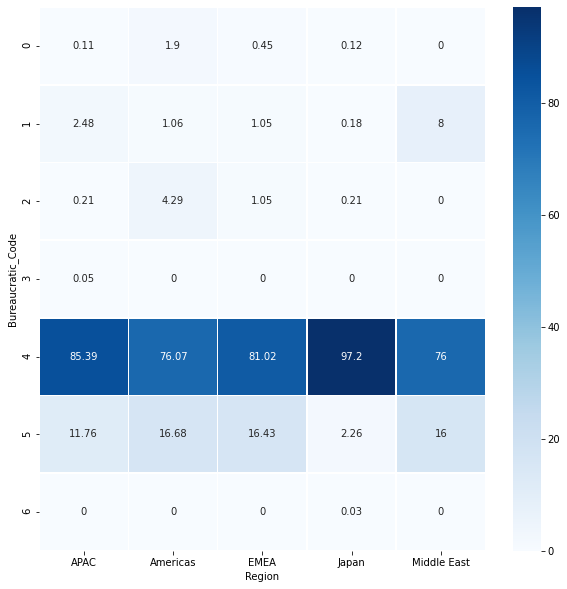

In [110]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pvt, annot=True, linewidths=.5, ax=ax, cmap='Blues', fmt='g')

# Evolución de los ingresos efectivos de oportunidades por región y año
# -- no tiene aplicado el concepto de oportunity id que descubrimosd a las 18:30 --

In [ ]:
# Lo primero es que para poder comparar todos los ingresos debo buscar llevarlo 
# a una moneda que pueda hacer la expresión en común de todo los valores

prospects_stage = train[["Opportunity_ID", "Region", "Delivery_Year", "ASP", "ASP_(converted)", "Total_Amount", "Stage"]].copy()

prospects_stage["conv_rate"] = prospects_stage["ASP"]/prospects_stage["ASP_(converted)"]
prospects_stage["Total_Amount_conv"] = prospects_stage["conv_rate"] * prospects_stage["Total_Amount"]

# luego solo nos vamos a enfocar en las oportunidades que alcanzaron a concretarse
prospects_stage_won = (prospects_stage.loc[prospects_stage["Stage"] == 'Closed Won'])
group_prospects_stage = prospects_stage.groupby(["Region", "Delivery_Year"])["Total_Amount_conv"].sum().reset_index()

En general vemos un inicio de descenso de ventas efectivas durante el 2017 que se acentua durante el 2018 con un ligero repunte a partir del año 2019. Tambien notamos que este analisis solo tiene un fuerte peso de la región del Japón lo que nos obliga a un segundo analisis separado para las demas regiones

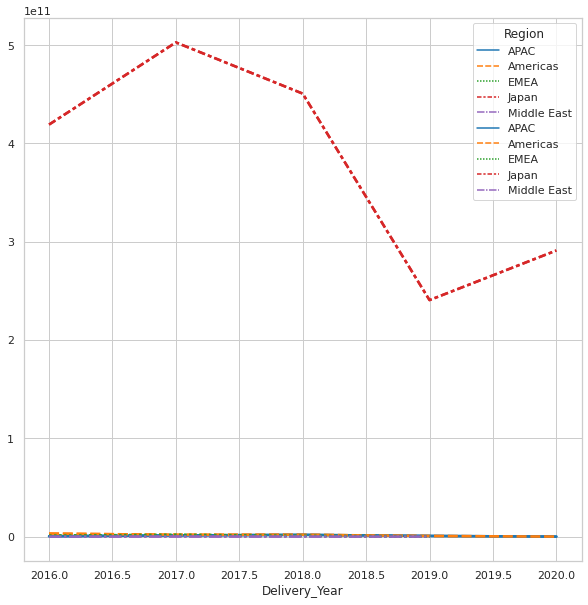

In [ ]:
sns.set_theme(style="whitegrid")

data = group_prospects_stage.pivot_table(values="Total_Amount_conv", index="Delivery_Year", columns="Region")
data.reset_index()

f, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax)

Como era de esperarse el ingreso proveniente de las oportunidades consumadas en la Región de Japón son de un orden tantas veces mayor a la de las demás regiones que nos obliga a visualizar los datos extrayendo el subconjunto de oportunidades en esta región como para poder visualizar la evolución en las demás regiones.
 
En general podemos ver un marcado descenso en los ingresos efectivos e incluso la completa capacidad de venta en las regiones de
Europa, Oriente Medio y África (EMEA) y el medio Ostes de los Estados Unidos a partir del año 2018

In [ ]:
# removemos la columna con los datos de Japón
del data['Japan']

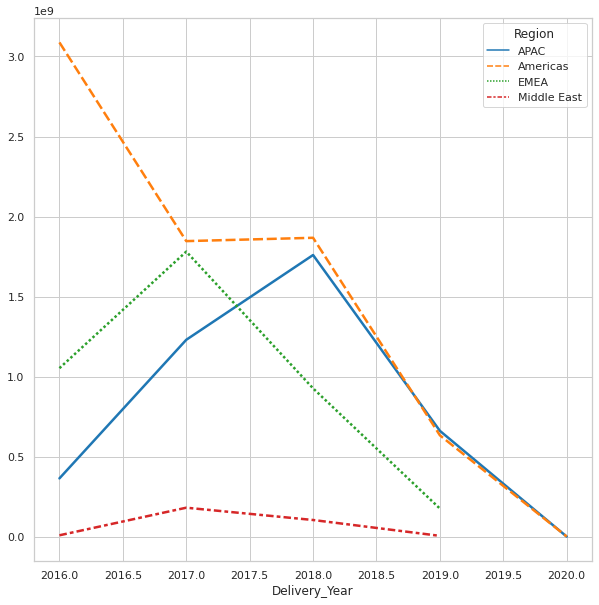

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax)